In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [2]:
def julia(c, xlim, ylim, res=500, accuracy=10, cmap='hsv'):
    """
    Creates an image of the julia set for Q_c(z) = z^2 + c
    
    Parameters:
        c (complex): the parameter for the qudratic map
        xlim (tuple): the x-limits of the graph
        ylim (tuple): the y-limits of the graph
        res (int): the square root of the number of grid points
        accuracy (int): the number of iterations to check
    
    Returns:
        (None): displays image with no return value
    """
    
#     define our function
    def _quad(z):
        '''The quadritic map'''
        return np.power(z,2) + c
    
#     here we create our domain
    x = np.linspace(xlim[0],xlim[1], res)
    y = np.linspace(ylim[0],ylim[1], res)
    X,Y = np.meshgrid(x,y)
    
#     this is the variable we will use to understand the shape
#     of the julia set
#     think of this as a portion of the complex plane
    Z = X + 1j*Y
    
#     this will help us color the image later
#     it counts how long it takes each point to escape
    escape = np.zeros((res,res), dtype=int)
    
    for i in range(accuracy):
#         iterate the function
        Z = _quad(Z)
        
#         update escape values
        mask = np.abs(Z) > 2
        escape[mask] = i+1
        Z[mask] = None
        
#     now we plot the Julia set

#     these variables are for the coloring
    cmap = plt.get_cmap(cmap)
    vmax = np.max(escape)
    cmap.set_bad(color='black')
    
#     resize the image so we can see it
    plt.figure(figsize=(20,20))
    
#     plot the image
    plt.pcolormesh(
        X,Y,escape,
        shading='gouraud',
        norm=col.LogNorm(vmin=1, vmax=vmax),
        cmap=cmap
    )
#     plt.axis('off')
    plt.gca().axis('image')
    plt.show()
    
                
    
    return

/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater


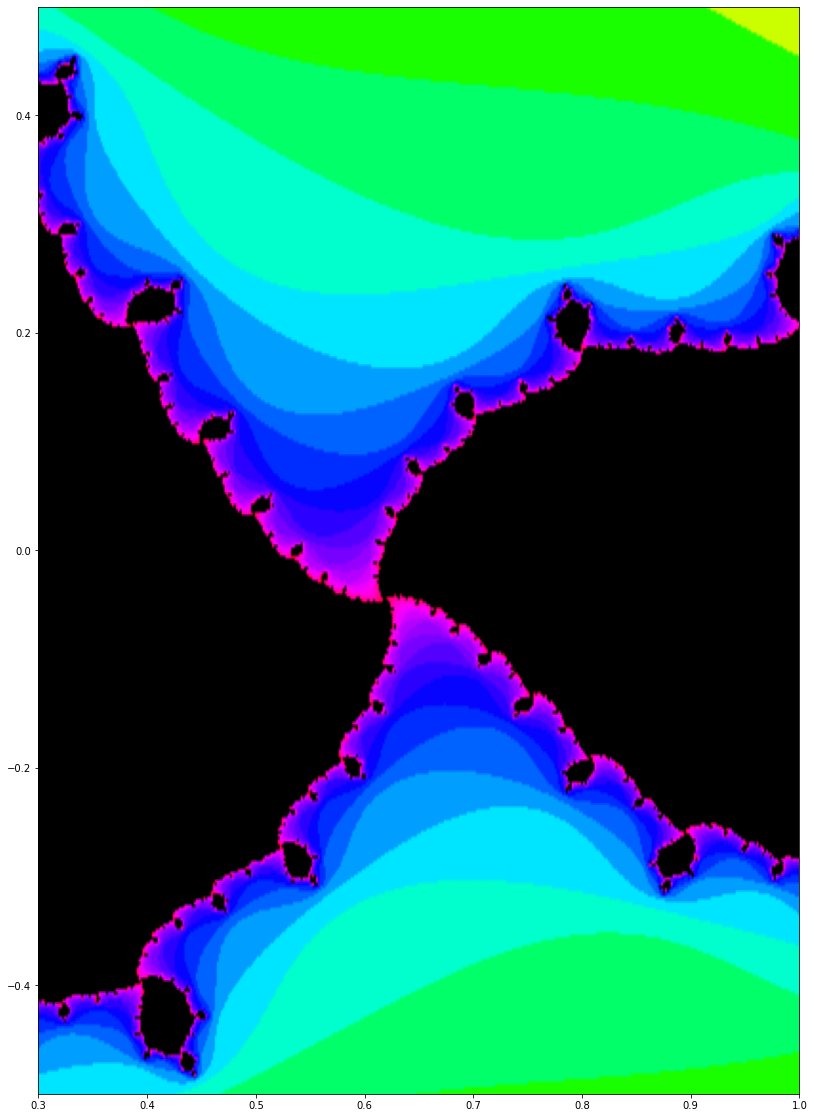

In [3]:
julia(complex(-1,.1), (.3,1), (-.5,.5), 400, 30)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater


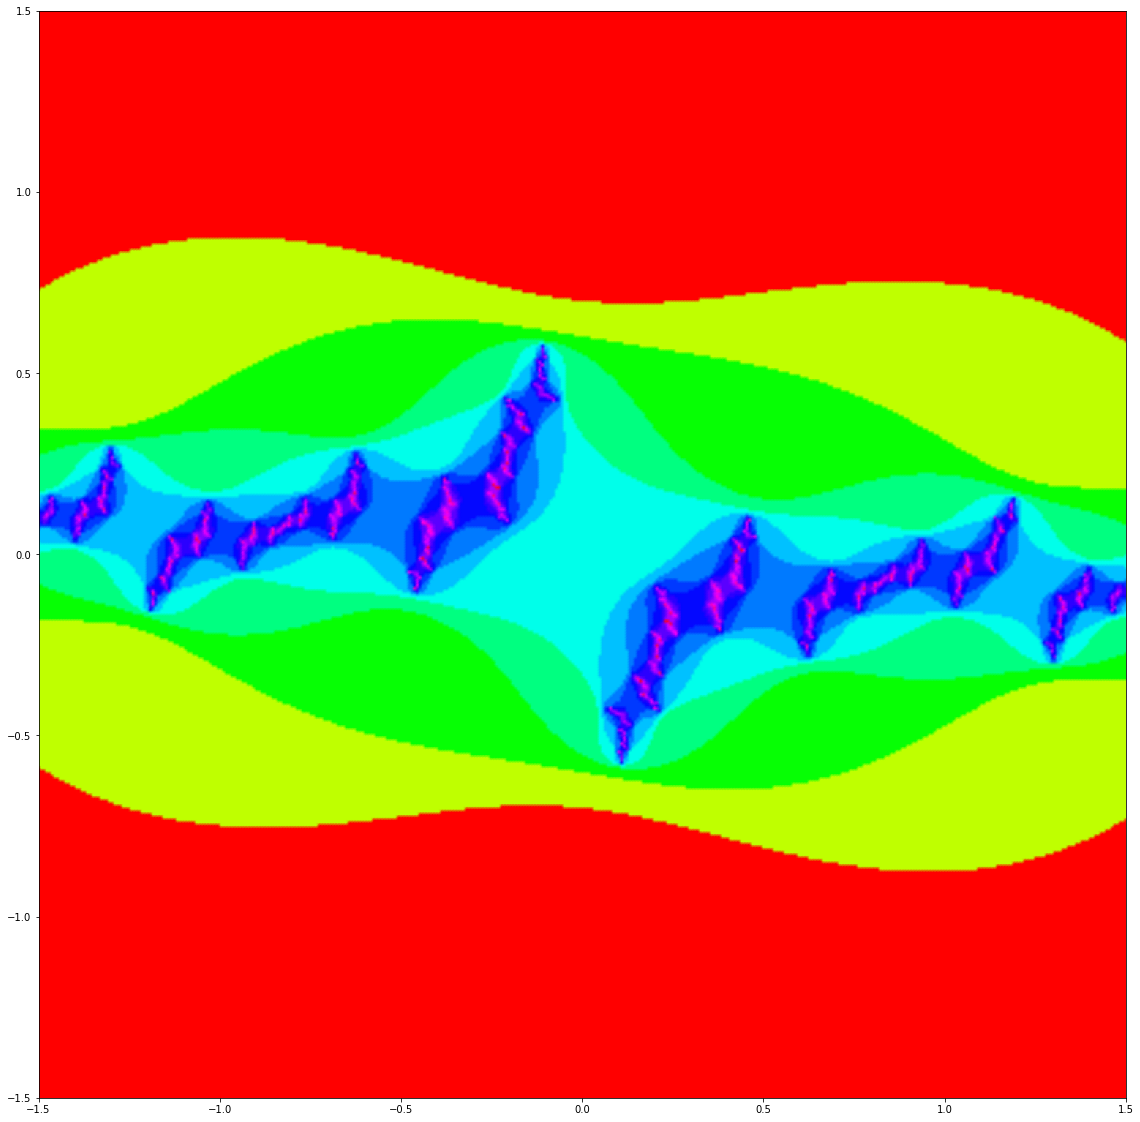

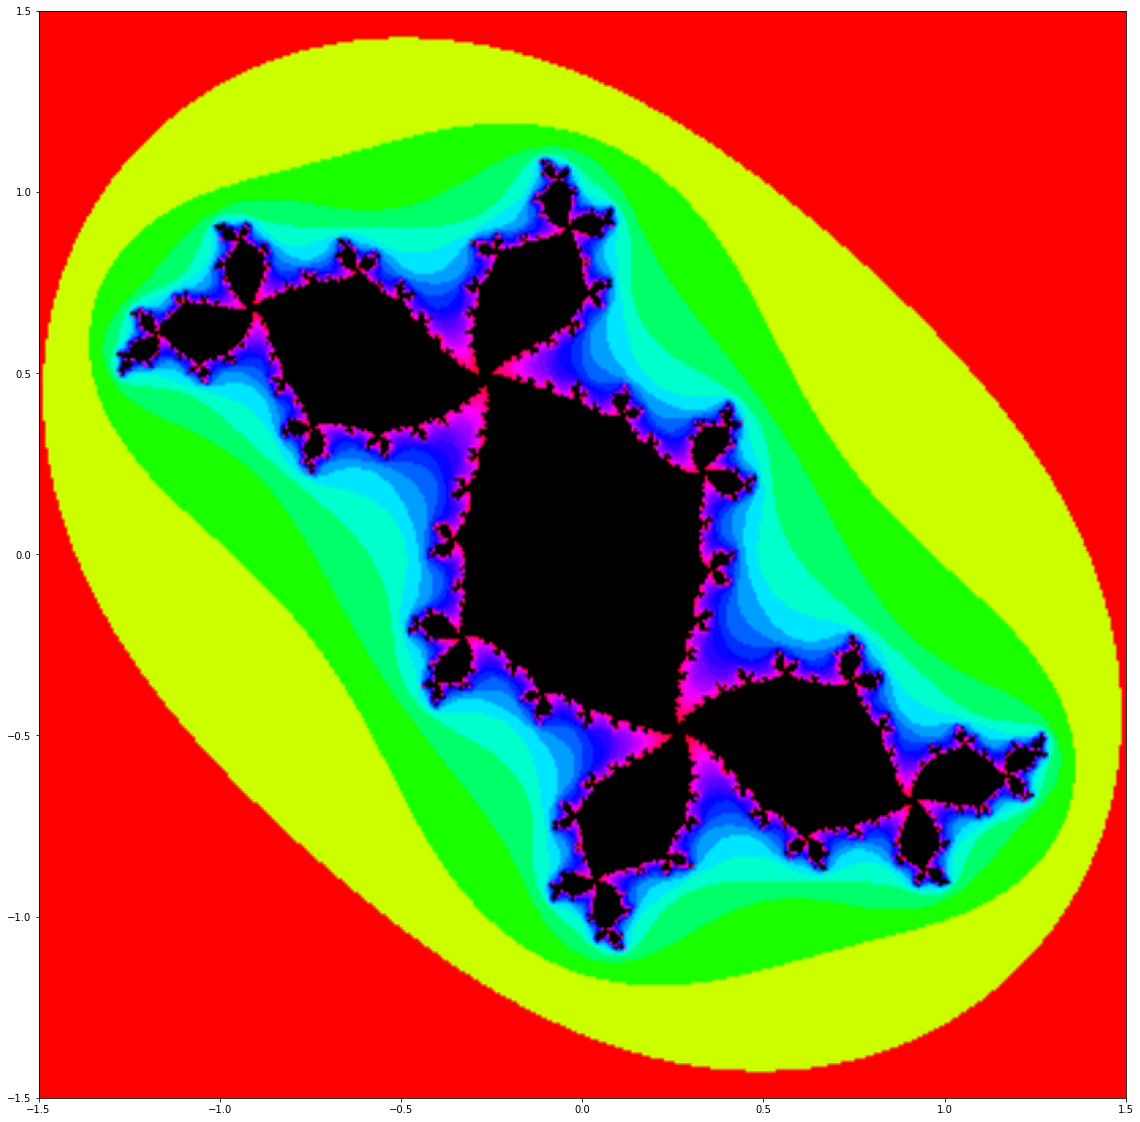

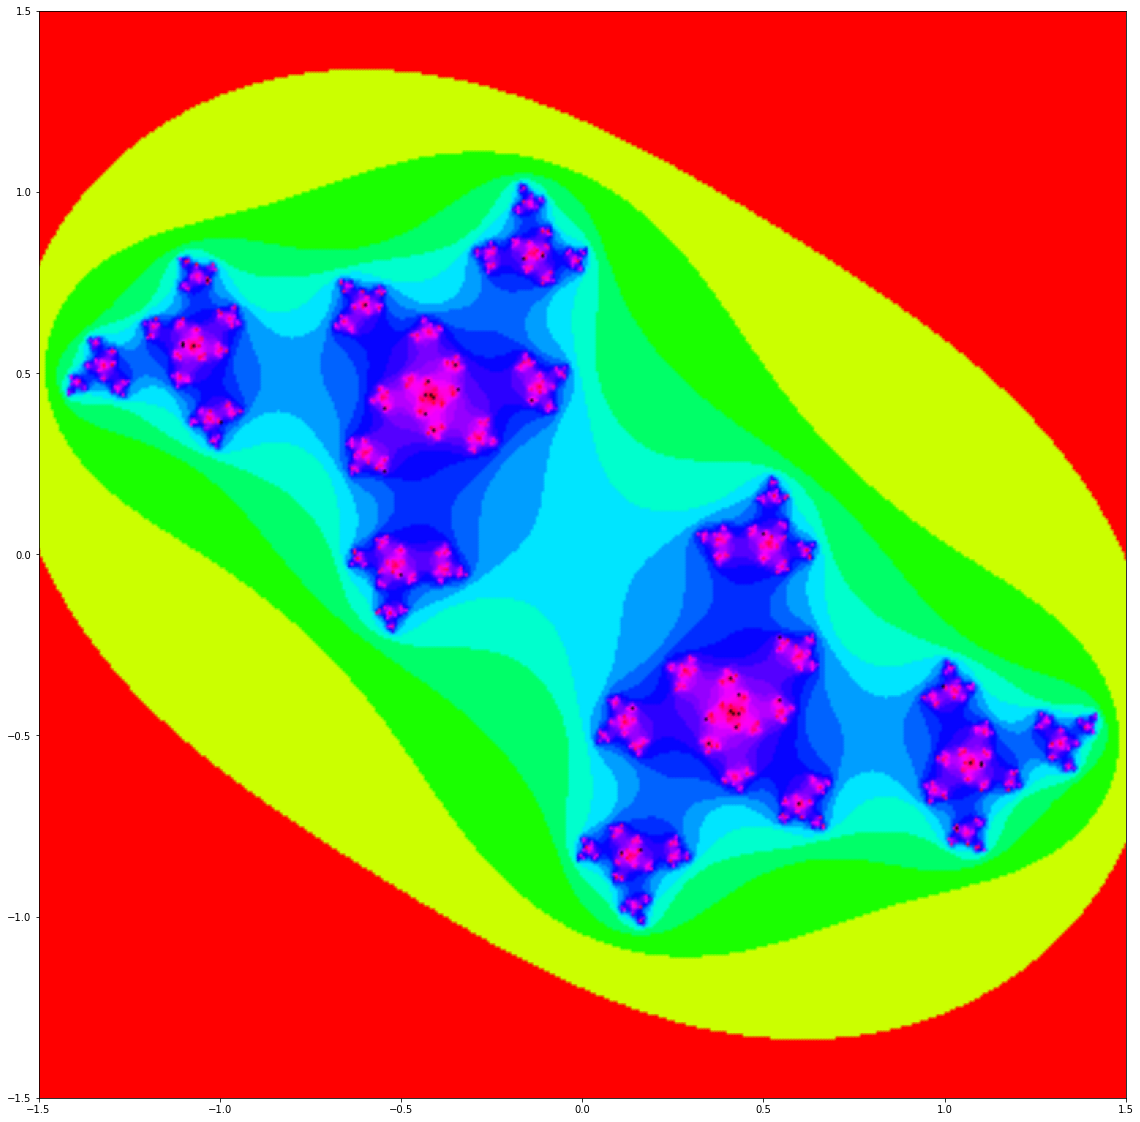

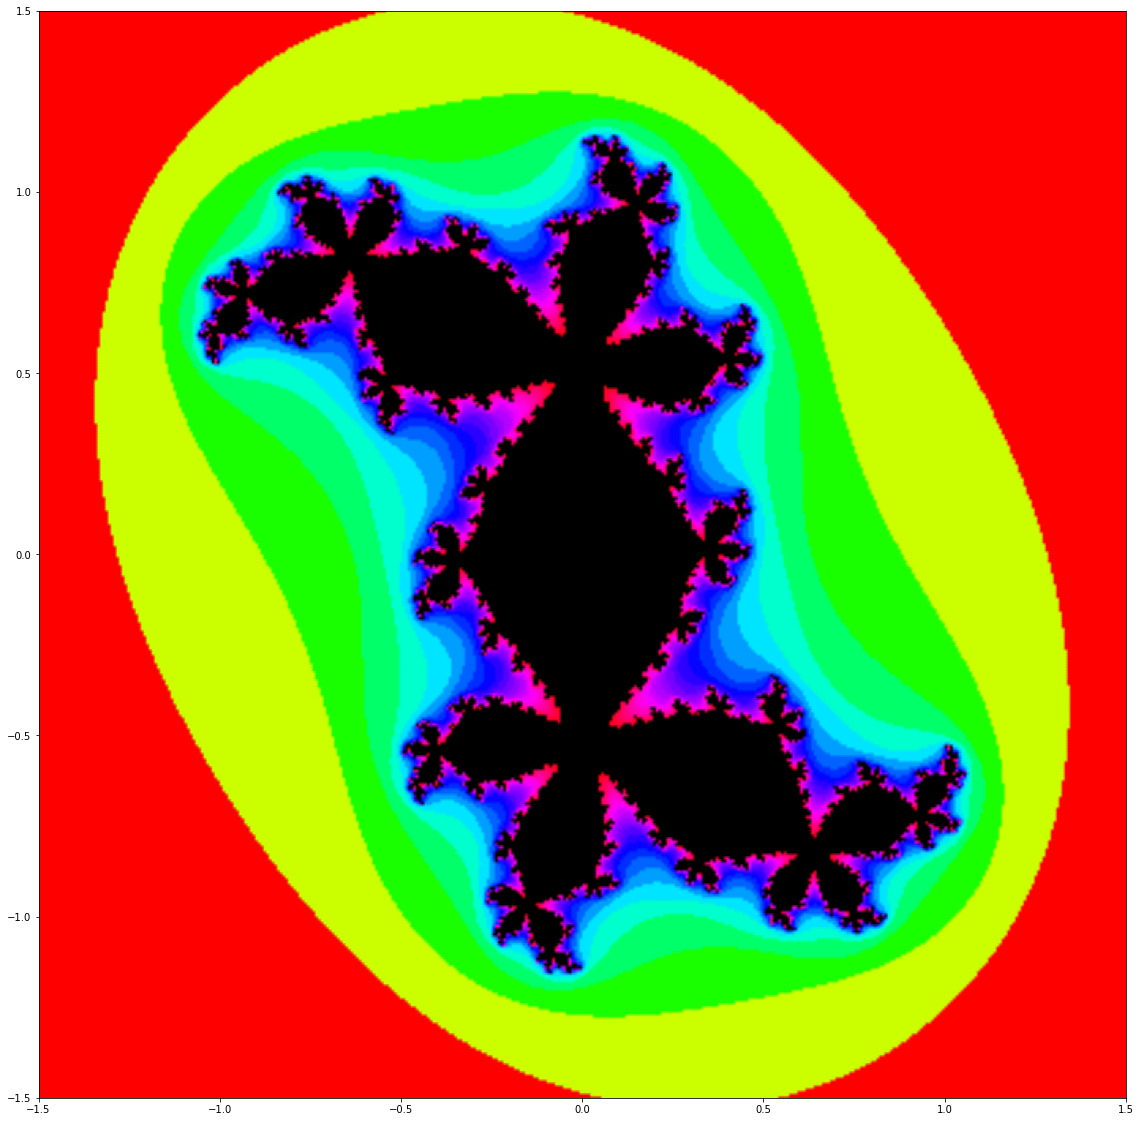

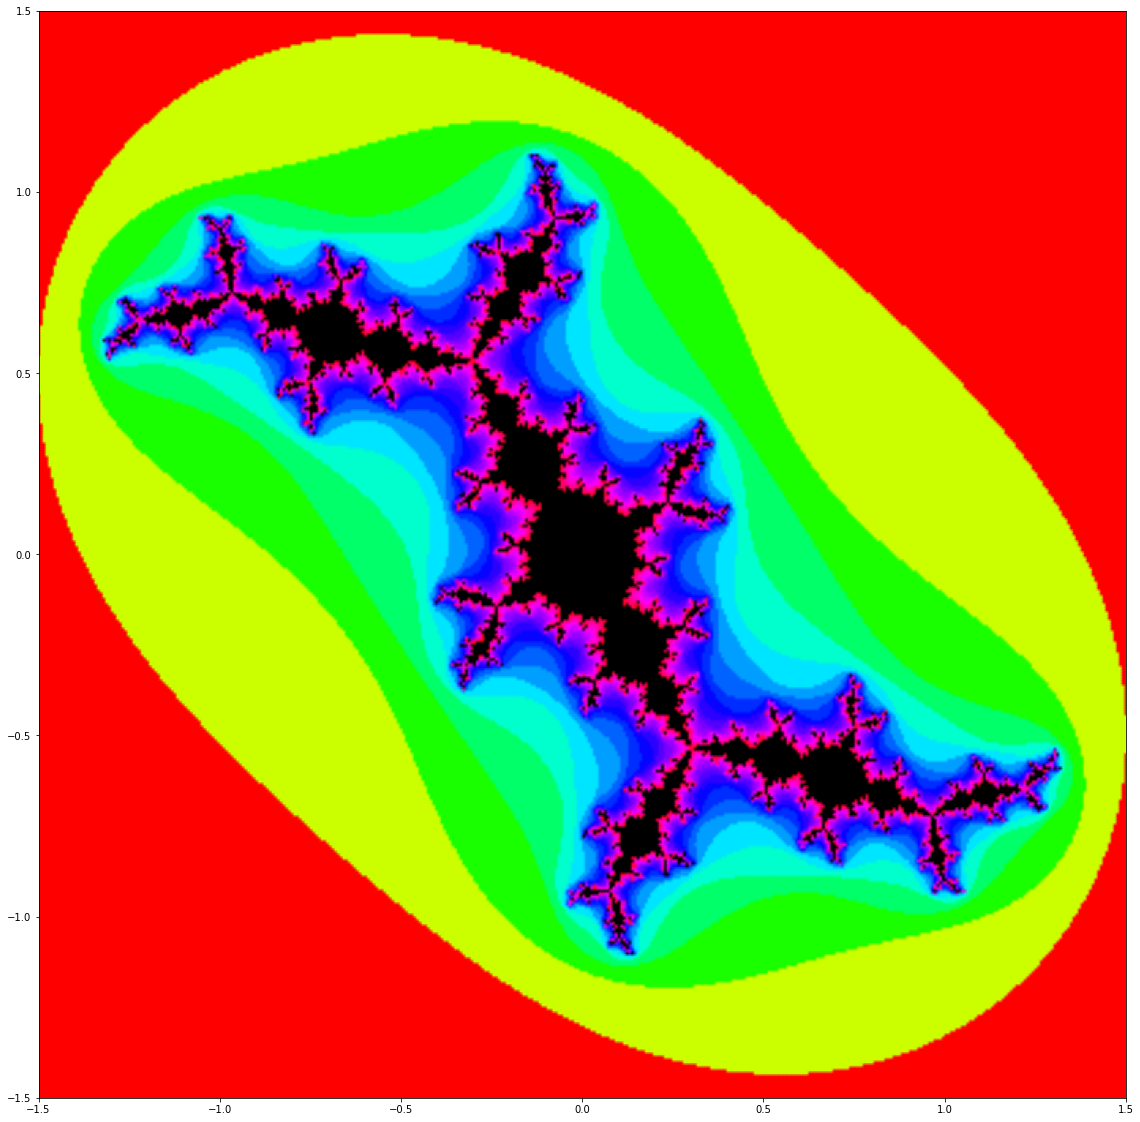

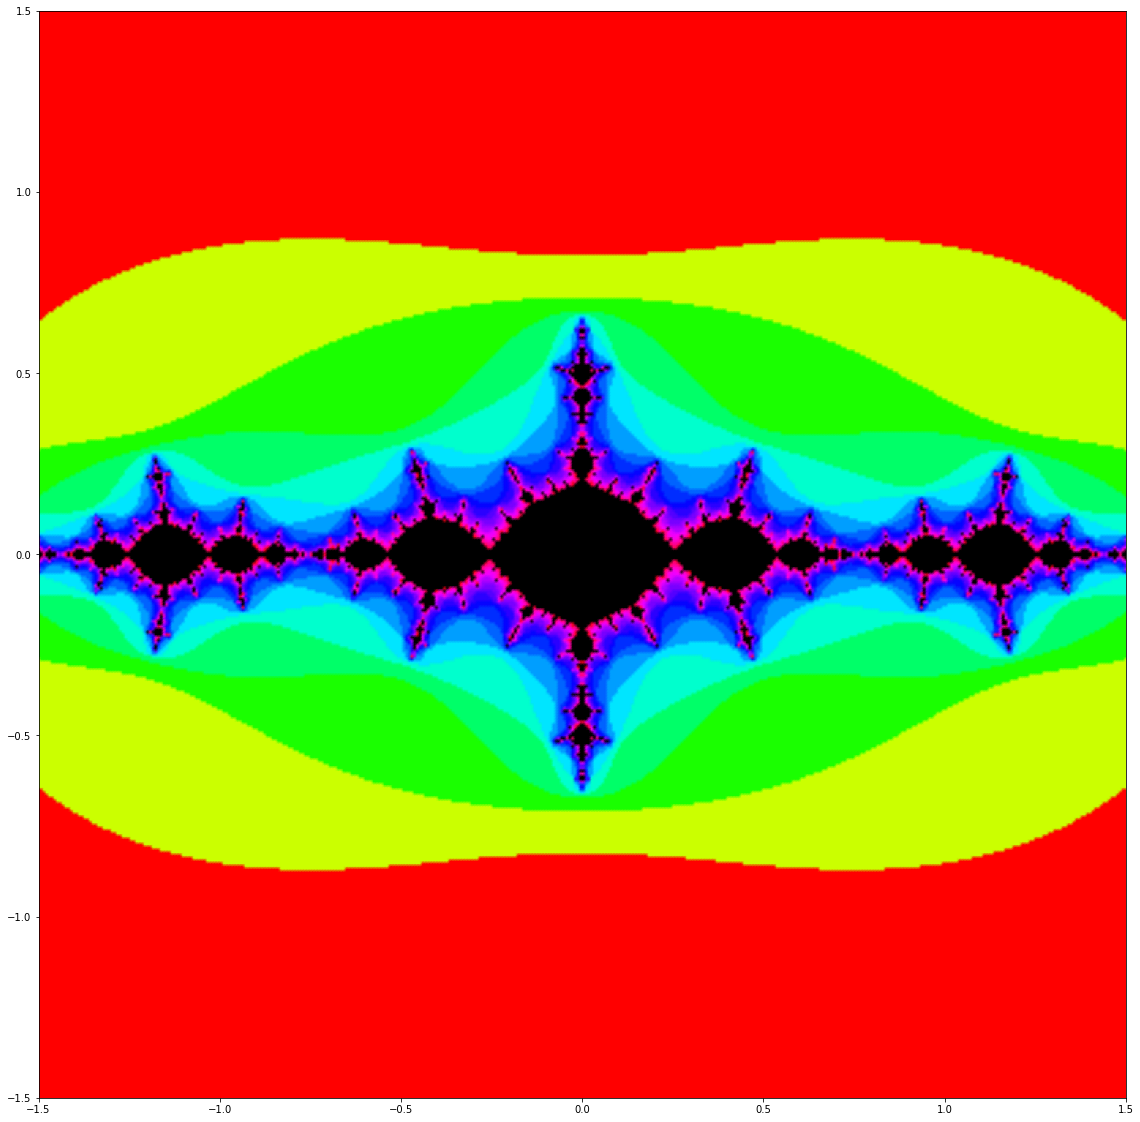

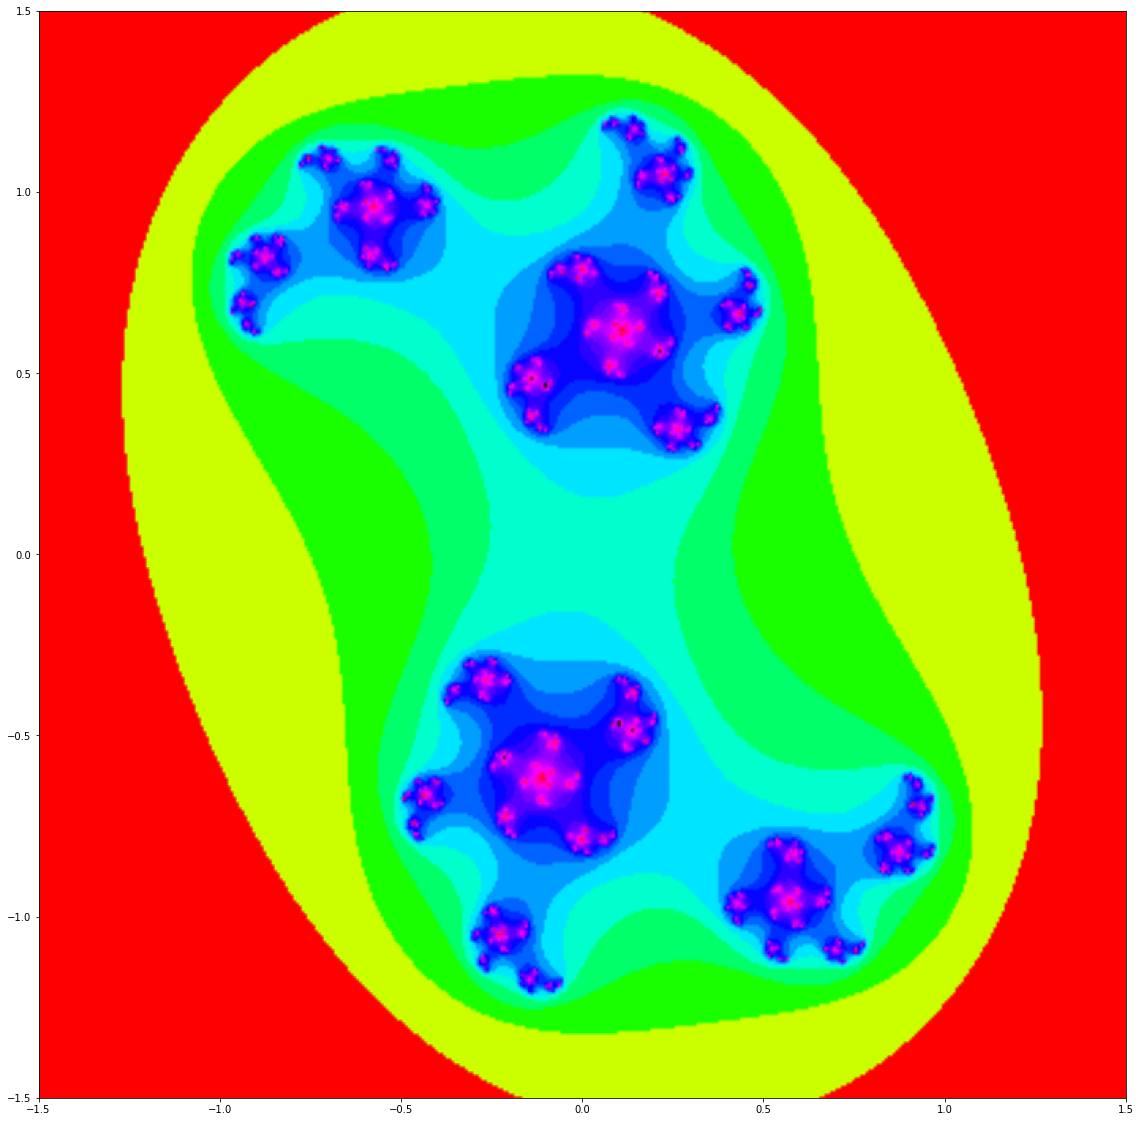

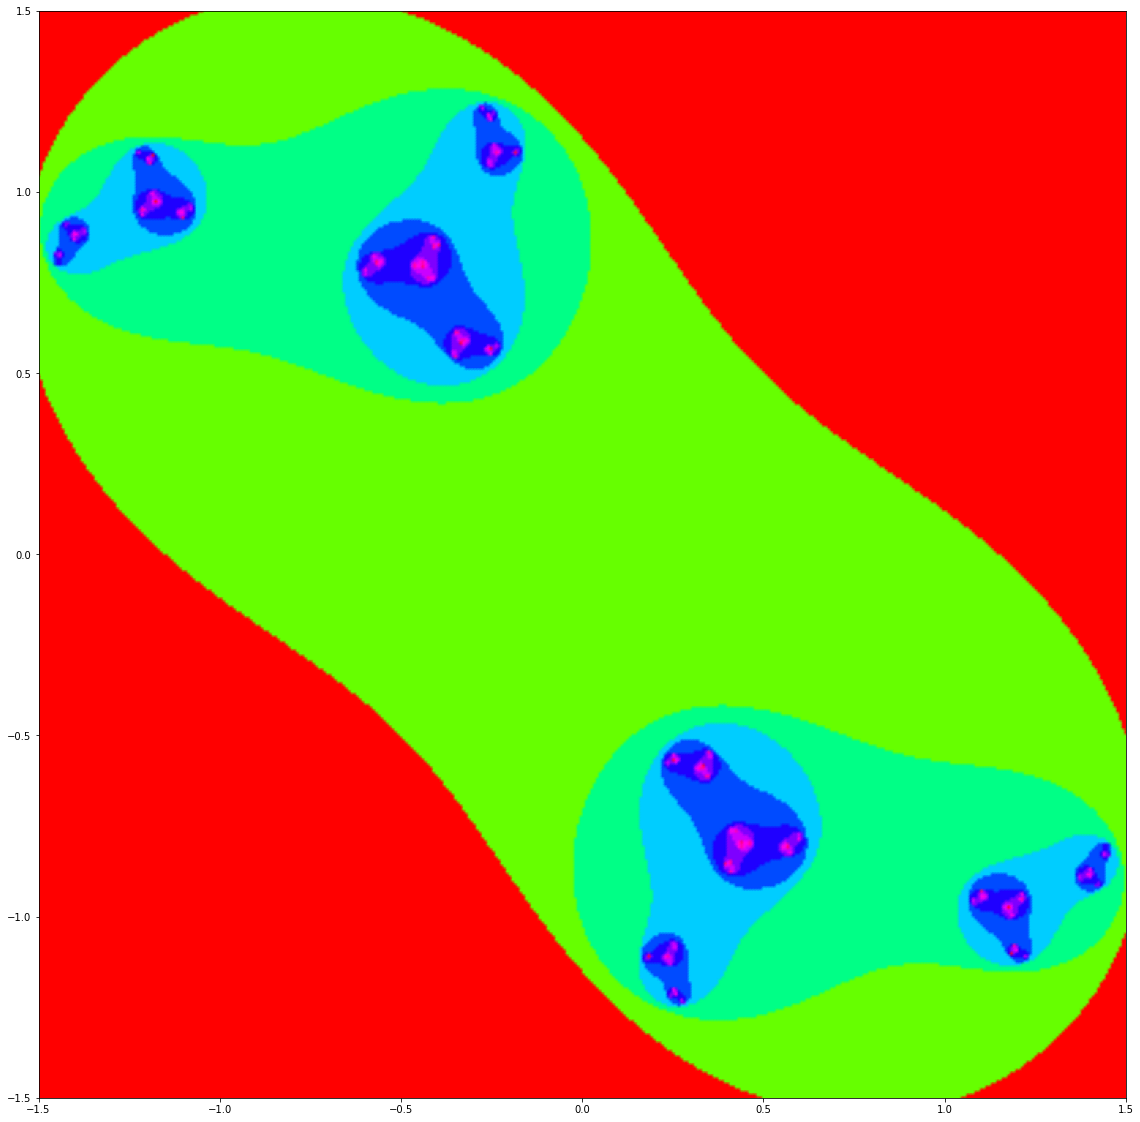

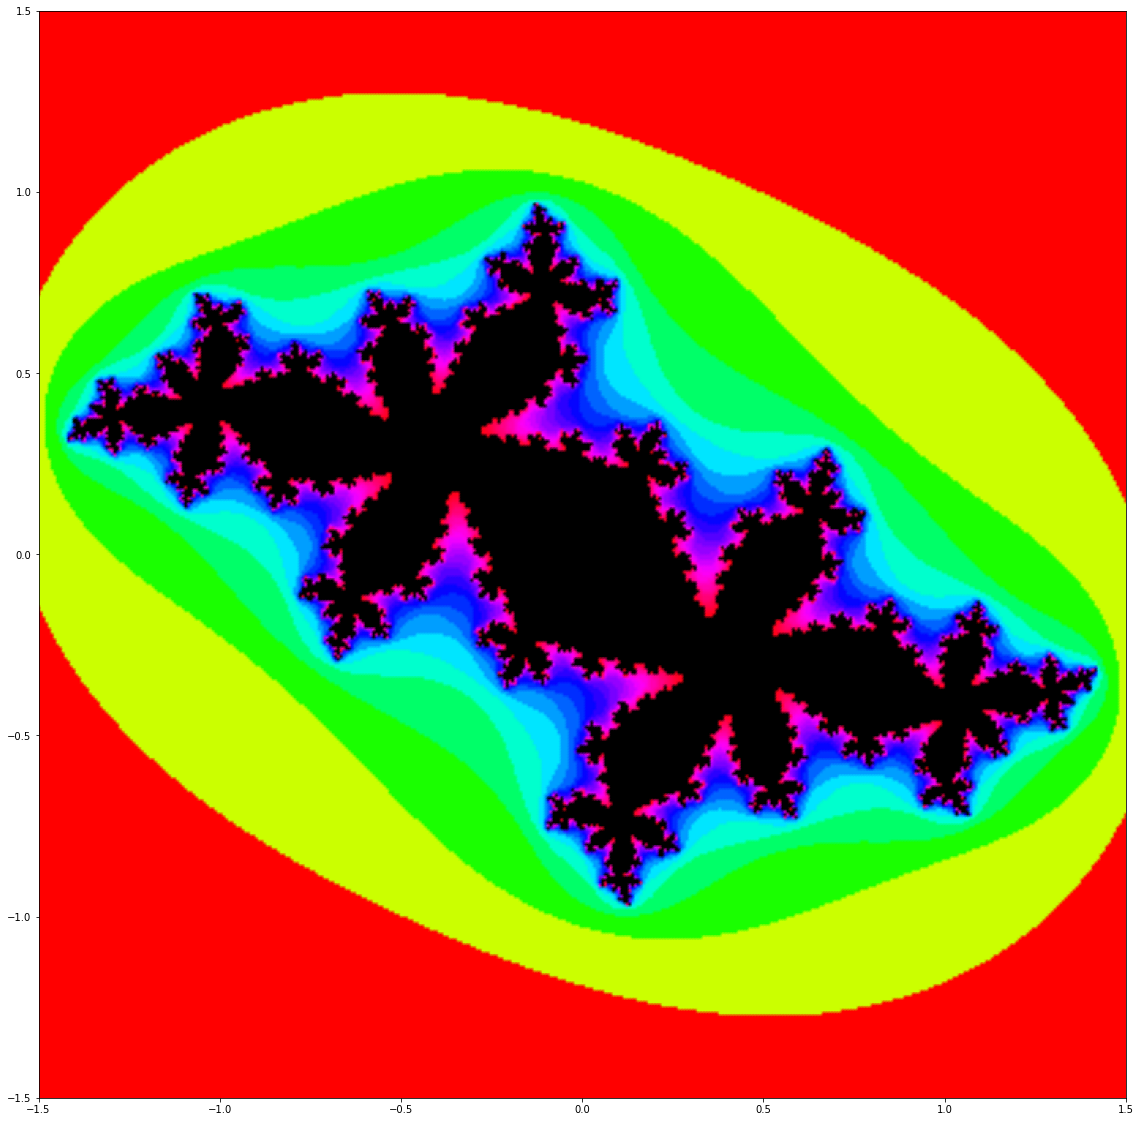

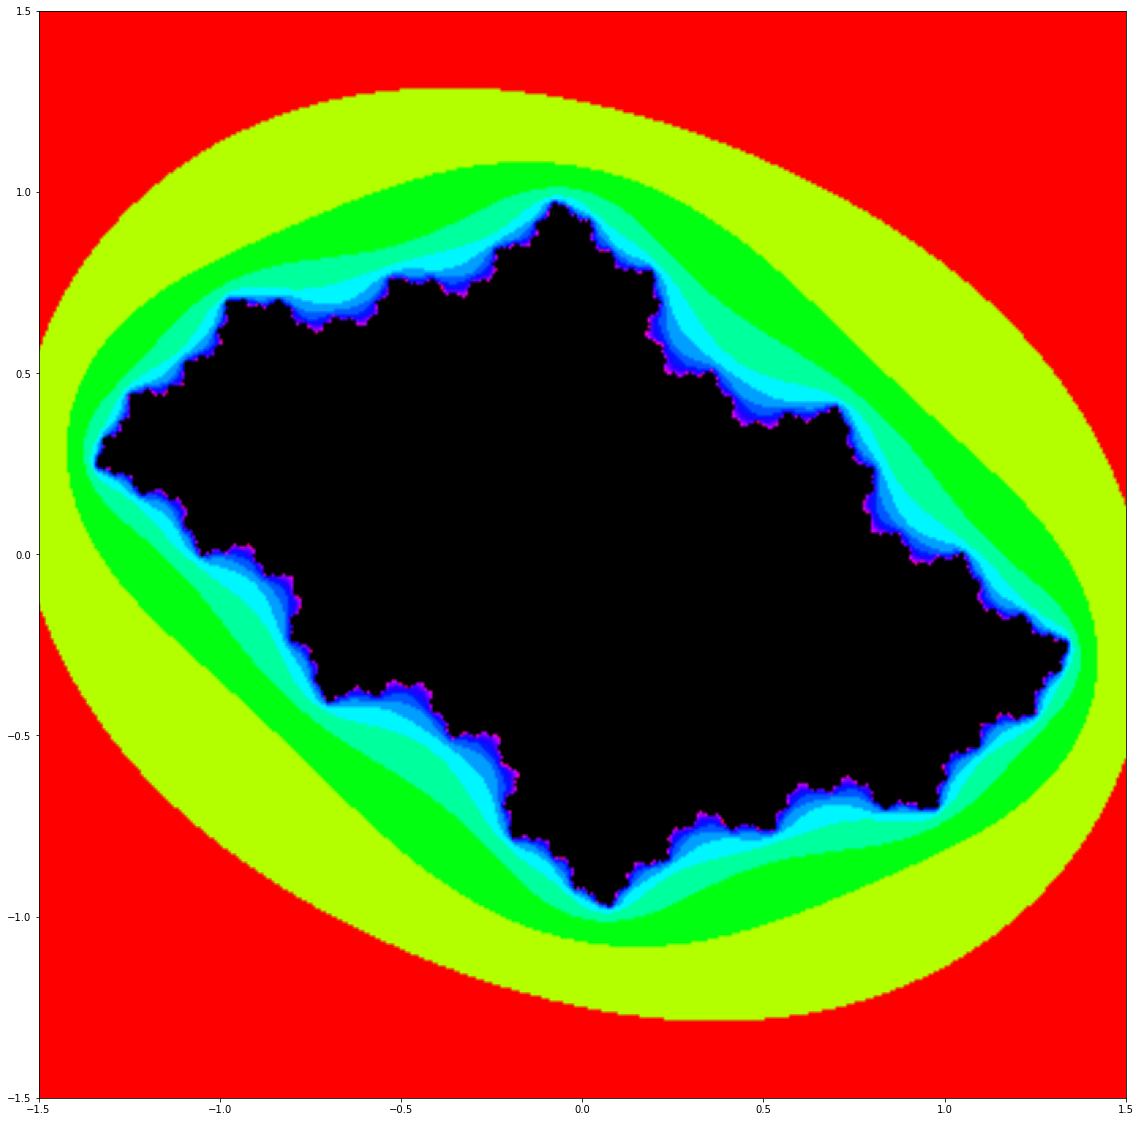

In [4]:
cs = [
    (-1.5, .2),(-.1,.75),(-.4,.8),(.28,.53),(-.11,.86),
    (-1.32,0),(.48,.48),(0,1.5),(-.5,.57),(-.4,.4)
]
for c in cs:
    c = complex(c[0],c[1])
    julia(c, (-1.5,1.5), (-1.5,1.5), 400, 30)    